In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.lines as mlines
import matplotlib.patches as mpatches

matplotlib.rcParams["text.usetex"] = True
matplotlib.rcParams["mathtext.fontset"] = "stix"
matplotlib.rcParams["font.family"] = "STIXGeneral"
matplotlib.rcParams["text.latex.preamble"]=r"\usepackage{amsmath}\usepackage{amssymb}"

In [2]:
epsilon = 0.1
N = 100

def approximate_r_values(Y, R, N):
    num_params = len(R)
    
    if N in Y:
        r_vals = (1-epsilon) * np.ones(num_params)
    else:
        r_vals = np.zeros(num_params)
        
    for i in range(num_params):
        if R[i] in Y:
            r_vals[i] = 1
    
    return r_vals

# One loop
def get_utility_values(J, num_iterations):
    utility_values = np.zeros(num_iterations)
    proposed_Y = np.arange(N+1)

    Y = np.array([])
    for i in range(num_iterations):
        r = np.random.randint(0, N, size=J)
        values_i = np.zeros(N+1)

        for j in range(len(proposed_Y)):
            aug_Y = np.concatenate([Y, proposed_Y[j:j+1]])
            values_i[j] = np.mean(approximate_r_values(aug_Y, r, N))

        new_Y = np.array([proposed_Y[np.argmax(values_i)]])
        Y = np.concatenate([Y, new_Y])
        utility_values[i] = np.mean(approximate_r_values(Y, np.arange(N), N))
        
    return Y, utility_values

In [3]:
num_iterations = 100
num_repeats = 20

In [4]:
generate_new = True

if generate_new:
    np.random.seed(5)
    utility_values_1 = np.zeros(shape=(num_repeats, num_iterations))
    utility_values_2 = np.zeros(shape=(num_repeats, num_iterations))
    utility_values_100 = np.zeros(shape=(num_repeats, num_iterations))
    for j in range(num_repeats):
        _, u1 = get_utility_values(1, num_iterations)
        utility_values_1[j, :] = u1

        _, u2 = get_utility_values(2, num_iterations)
        utility_values_2[j, :] = u2

        _, u100 = get_utility_values(100, num_iterations)
        utility_values_100[j, :] = u100
        
    title = f"data/epsilon_{epsilon}_utility_values_1.npy"
    np.save(title, utility_values_1)

    title = f"data/epsilon_{epsilon}_utility_values_2.npy"
    np.save(title, utility_values_2)

    title = f"data/epsilon_{epsilon}_utility_values_100.npy"
    np.save(title, utility_values_100)
    
else:
    title = f"data/epsilon_{epsilon}_utility_values_1.npy"
    utility_values_1 = np.load(title)

    title = f"data/epsilon_{epsilon}_utility_values_2.npy"
    utility_values_2 = np.load(title)

    title = f"data/epsilon_{epsilon}_utility_values_100.npy"
    utility_values_100 = np.load(title)

In [5]:
mean_u1 = np.mean(utility_values_1, axis=0)
std_u1 = np.std(utility_values_1, axis=0)

mean_u2 = np.mean(utility_values_2, axis=0)
std_u2 = np.std(utility_values_2, axis=0)

mean_u100 = np.mean(utility_values_100, axis=0)
std_u100 = np.std(utility_values_100, axis=0)

t = np.arange(1, num_iterations+1)

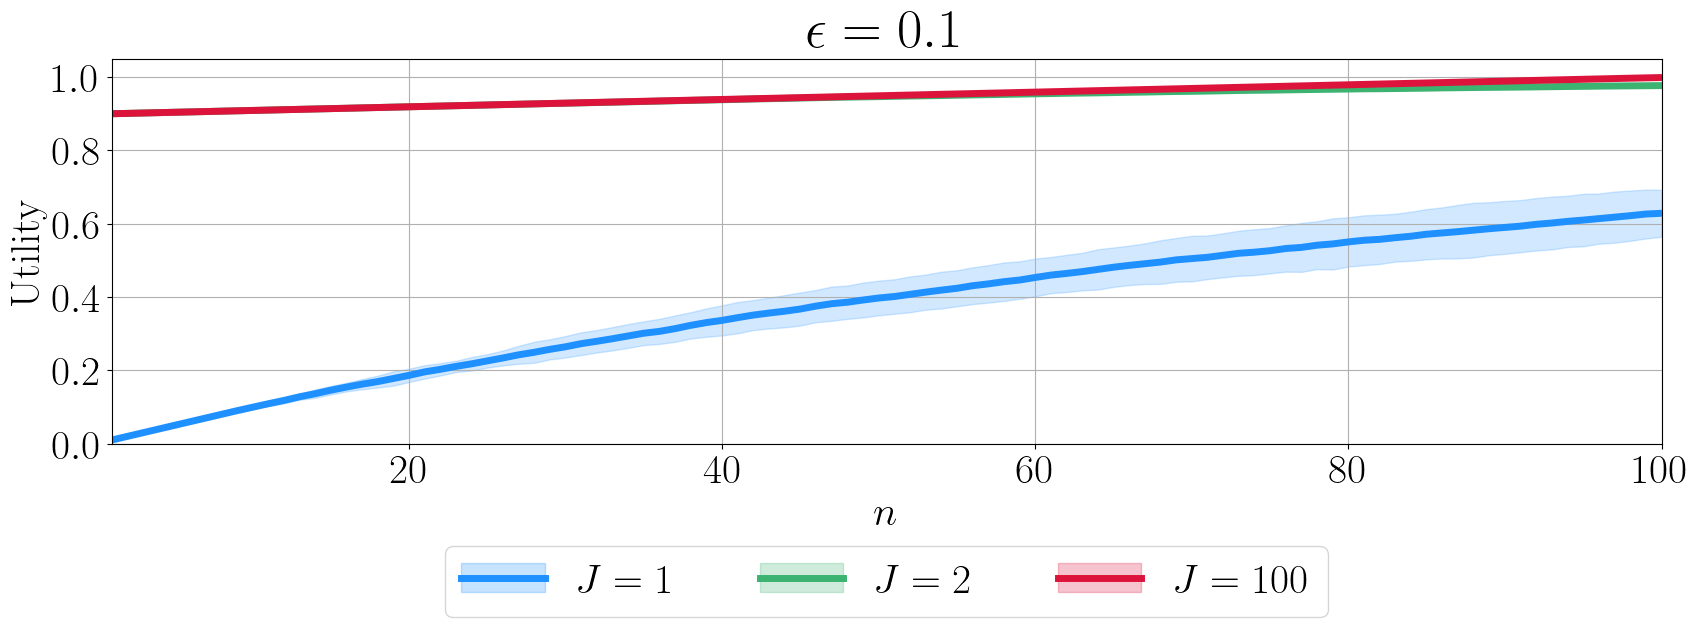

In [6]:
fig = plt.figure(figsize=(20, 5))
plt.plot(t, mean_u1, color="dodgerblue", linewidth=5)
plt.fill_between(t, mean_u1+2*std_u1, mean_u1-2*std_u1, color="dodgerblue", alpha=0.2)

plt.plot(t, mean_u2, color="mediumseagreen", linewidth=5)
plt.fill_between(t, mean_u2+2*std_u2, mean_u2-2*std_u2, color="mediumseagreen", alpha=0.2)

plt.plot(t, mean_u100, color="crimson", linewidth=5)
plt.fill_between(t, mean_u100+2*std_u100, mean_u100-2*std_u100, color="crimson", alpha=0.2)
plt.ylim(0, 1.05)
plt.xlim(1, num_iterations)
plt.xlabel(r"$n$", fontsize=30)
plt.ylabel("Utility", fontsize=30)
plt.title(r"$\epsilon={}$".format(epsilon), fontsize=40)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)

blue_line = mlines.Line2D([], [], color="dodgerblue", linestyle="-", linewidth=5)
blue_patch = mpatches.Patch(color="dodgerblue", alpha=0.25)

green_line = mlines.Line2D([], [], color="mediumseagreen", linestyle="-", linewidth=5)
green_patch = mpatches.Patch(color="mediumseagreen", alpha=0.25)

red_line = mlines.Line2D([], [], color="crimson", linestyle="-", linewidth=5)
red_patch = mpatches.Patch(color="crimson", alpha=0.25)

labels = [r"$J=1$", "$J=2$", r"$J=100$",]

plt.legend(
    handles=[(blue_line, blue_patch), (green_line, green_patch), (red_line, red_patch)], 
    labels=labels, 
    ncol=3, fontsize=30, loc=(0.215,-0.45)
)

plt.grid()
plt.show()